In [15]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [16]:
experience_salary_df = pd.read_csv("/content/sample_data/Experience-Salary.csv")

<Axes: xlabel='exp(in months)', ylabel='salary(in thousands)'>

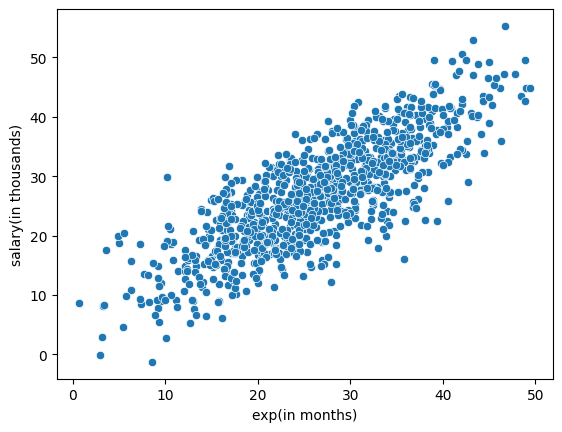

In [17]:
sb.scatterplot(x='exp(in months)', y='salary(in thousands)', data=experience_salary_df)

In [ ]:
features = experience_salary_df['exp(in months)'].to_numpy()
[training_features, test_features] = np.split(features,2)
training_features, test_features

In [ ]:
targets = experience_salary_df['salary(in thousands)'].to_numpy()
[training_targets, test_targets] = np.split(targets, 2)
training_targets, test_targets

In [20]:
class UnivariateLinearRegression:
    def __init__(self, features, targets):
        self.X = features
        self.m = len(self.X)
        self.Y = targets
        self.W = 0
        self.b = 0

    def _model(self):
        return (self.W * self.X) + self.b

    def _error(self):
        Y_pred = self._model()
        return np.sum((Y_pred - self.Y)**2)*(1/(2*self.m))

    def train(self, iterations, learning_rate):
        for _ in range(iterations):
            Y_pred = self._model()
            self.W -= learning_rate * (1/self.m) * np.sum((Y_pred - self.Y)*self.X)
            self.b -= learning_rate * (1/self.m) * np.sum((Y_pred - self.Y))

    def predict(self, features):
      return (self.W * features) + self.b


In [21]:
algorithm = UnivariateLinearRegression(training_features, training_targets)

In [22]:
algorithm._error()

393.1723648250035

In [23]:
algorithm.train(1000000, 0.001)

In [24]:
algorithm._error()

13.359767046397316

In [25]:
predictions = algorithm.predict(test_features)

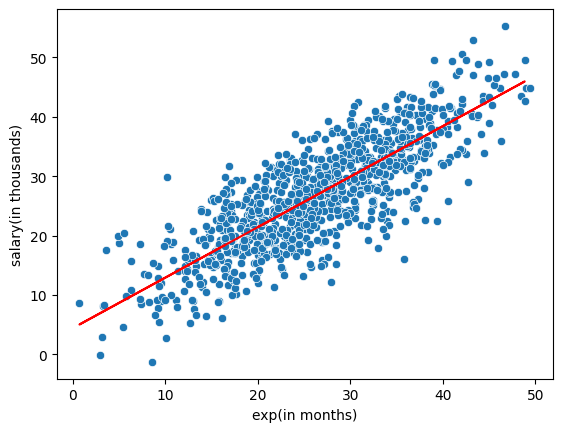

In [29]:
sb.scatterplot(x='exp(in months)', y='salary(in thousands)', data=experience_salary_df)
plt.plot(test_features, predictions, color="red")
plt.show()